# Final Exam - New York City Taxi Fare Prediction

Course: AP4063

Student Number: 109601003

Name: 林群賀

#### Baseline: 4.03742

## Import the package

In [65]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

## Import the data sets.

In [66]:
data_path = os.getcwd()
train_data_path = data_path + '/data/taxi_fare_train.csv'
test_data_path = data_path + '/data/taxi_fare_test.csv'

df_train = pd.read_csv(train_data_path, nrows=500_000)
df_test = pd.read_csv(test_data_path)

In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                500000 non-null  object 
 1   fare_amount        500000 non-null  float64
 2   pickup_datetime    500000 non-null  object 
 3   pickup_longitude   500000 non-null  float64
 4   pickup_latitude    500000 non-null  float64
 5   dropoff_longitude  499995 non-null  float64
 6   dropoff_latitude   499995 non-null  float64
 7   passenger_count    500000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 30.5+ MB


In [68]:
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [69]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000
mean,11.358361,-72.519958,39.920276,-72.522435,39.916526,1.683428
std,9.916617,11.856831,8.073475,11.797362,7.391002,1.307395
min,-44.900000,-2986.242495,-3116.285383,-3383.296608,-2559.748913,0.000000
25%,6.000000,-73.992047,40.734917,-73.991382,40.734057,1.000000
50%,8.500000,-73.981785,40.752670,-73.980126,40.753152,1.000000
75%,12.500000,-73.967117,40.767076,-73.963572,40.768135,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


#### I found that there were a lot of unreasonable data, so I corrected them by replacing them with the average. However, even with these changes, the score I obtained was 8.73076, which is not higher than the baseline.

In [70]:
# df_train[df_train['pickup_longitude'] < -73.992047] = -73.981785
# df_train[df_train['pickup_latitude'] < 40.734917] = 40.752670
# df_train[df_train['pickup_longitude'] > -73.967117] =  -73.981785
# df_train[df_train['pickup_latitude'] < 40.767076] = 40.752670

# df_train[df_train['dropoff_longitude'] < -73.991382] = -73.980126
# df_train[df_train['dropoff_latitude'] < 40.734057] = 40.753152
# df_train[df_train['dropoff_longitude'] > -73.963572] =  -73.980126
# df_train[df_train['dropoff_latitude'] < 40.768135] = 40.753152

# df_train.describe()

In [71]:
train_Y = np.array(df_train['fare_amount'])
ids = df_test['key']

df_train = df_train.drop(['key', 'fare_amount'] , axis=1)
df_test = df_test.drop(['key'] , axis=1)
df = pd.concat([df_train,df_test])

df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [72]:
df_train['diff_lat'] = (df_train['dropoff_latitude'] - df_train['pickup_latitude']).abs()
df_train['diff_long'] = (df_train['dropoff_longitude'] - df_train['pickup_longitude'] ).abs()

df_test['diff_lat'] = (df_test['dropoff_latitude'] - df_test['pickup_latitude']).abs()
df_test['diff_long'] = (df_test['dropoff_longitude'] - df_test['pickup_longitude'] ).abs()

In [73]:
df_train.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,diff_lat,diff_long
0,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.009041,0.002701
1,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.070701,0.036780
2,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.010708,0.008504
3,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.024949,0.004437
4,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.015754,0.011440


#### With this plot, we can observe that the passengers almost take the taxi in the same place.

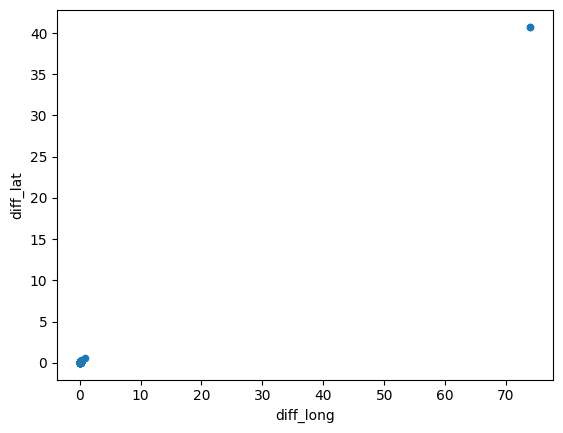

In [74]:
plot = df_train.iloc[:2000].plot.scatter('diff_long', 'diff_lat')

#### By using the mean of the latitude and longitude, I was able to achieve a score of 9.40441. However, this score is still not higher than the baseline.

In [75]:
# df['distance_2D'] = (
#     (df['dropoff_longitude'].mean() - df['pickup_longitude'].mean()) ** 2 + \
#     (df['dropoff_latitude'].mean() - df['pickup_latitude'].mean()) ** 2) ** 0.5

In [76]:
df['distance_2D'] = (
    (df['dropoff_longitude'] - df['pickup_longitude']) ** 2 + \
    (df['dropoff_latitude'] - df['pickup_latitude']) ** 2) ** 0.5


df = df.drop(['pickup_longitude', 
              'pickup_latitude', 
              'dropoff_longitude', 
              'dropoff_latitude', 
              'pickup_datetime'
              ], axis=1)
              
df.head()

,passenger_count,distance_2D
0,1,0.009436
1,1,0.079696
2,2,0.013674
3,1,0.025340
4,1,0.019470


In [77]:
df['passenger_count'] = df['passenger_count'].fillna(-1)
df['distance_2D'] = df['distance_2D'].fillna(-1)

## Prediction

#### With the Gradient Boosting Machine Model

In [78]:
from sklearn import datasets, metrics
from sklearn.ensemble import GradientBoostingRegressor

In [79]:
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]

reg = GradientBoostingRegressor()
reg.fit(train_X, train_Y)
pred = reg.predict(test_X)

## Output the Results

In [80]:
data_path = os.getcwd()
data_path += "/data/my_result/"
pred = np.array(pred)
sub = pd.DataFrame({'key': ids, 'fare_amount': pred})
sub.to_csv(data_path + 'taxi_1111_finalexam.csv', index=False) 

## My Result

#### The screenshot

![the result](./data/my_result/taxi_1111_finalexam.png)

## What I have tried?

1. 
   I attempted to process the data because some of the latitude and longitude values were not reasonable, particularly the maximum and minimum values. However, after replacing them, the results were not as expected. 

   Therefore, based on my previous experience with the Titanic random forest, I was afraid that errors would propagate to an uncontrollable extent. 
   
   As a result, I chose to adopt the baseline approach.

## Reference

[New York City Taxi Fare Prediction](https://medium.com/analytics-vidhya/new-york-city-taxi-fare-prediction-1ba96223ba7e)

[NYC Taxi Fare Prediction](https://towardsdatascience.com/nyc-taxi-fare-prediction-605159aa9c24)

[New-York-City-Taxi-Fare-Prediction-Machine-Learning](https://github.com/nikoshet/New-York-City-Taxi-Fare-Prediction-Machine-Learning/blob/master/Machine_Learning_Project.ipynb)

[NYC Taxi Fare Prediction with Gradient Boosting Algorithm](https://towardsdatascience.com/nyc-taxi-fare-prediction-with-gradient-boosting-algorithm-9ff7a1eded1e)